In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from sklearn.cluster import KMeans

In [38]:
data = pd.read_json('/content/drive/MyDrive/Colab Notebooks/biogen.json')
df = pd.json_normalize(data['objects'])

In [39]:
df

,IDPaciente,gen_1,gen_2,gen_3,gen_4,gen_5,gen_6,gen_7,gen_8,gen_9,gen_10,Edad,Genero,Condicion
0,1,,1.56727559704672,,,,,,4.61510398174408,2.6853942157167,4.01347579621406,,Male,5
1,2,,4.84491073612352,,,,,,1.09363147993275,3.74779861175818,4.33826035509736,,Female,7
2,3,,2.61909114272291,,,,,,5.52296626359362,4.66439132516477,4.70076461355237,,Female,6
3,4,,5.7722049512771,,,,,,5.93057784574599,1.85451891685581,4.95693317007131,,Female,8
4,5,,3.14637125802523,,,,,,4.78239219346195,3.98157461359239,4.4811641077889,,Female,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,3.98423602943506,2.50144849042476,2.43428515011179,2.99237129417824,2.11343786963887,3.04824975880247,5.89722112840843,2.3181842497169,3.77092146862807,2.00490502128606,23,Female,8
996,997,1.59996947348116,4.08500847084681,5.79767503533404,1.18058109524687,3.37796156451942,2.09019090611962,2.06356761141846,1.76586563874309,1.0069687054525,3.74554536433217,67,Female,6
997,998,1.22951050532493,1.1449468830344,2.27662054555333,5.04843495835012,5.05522066450455,3.7631652489133,4.15190845502164,1.44009216476236,1.40971836327096,4.55556009782272,59,Female,0
998,999,4.43660288929781,5.06305568668202,5.25314349739493,4.18292967378298,5.55127583236959,5.59536071568511,4.88590463990621,5.1700397940213,3.2715278711503,1.20702574365168,61,Female,0


# Preprocesamiento

In [57]:
df_copia = df

In [58]:
df_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   IDPaciente  1000 non-null   object
 1   gen_1       1000 non-null   object
 2   gen_2       1000 non-null   object
 3   gen_3       1000 non-null   object
 4   gen_4       1000 non-null   object
 5   gen_5       1000 non-null   object
 6   gen_6       1000 non-null   object
 7   gen_7       1000 non-null   object
 8   gen_8       1000 non-null   object
 9   gen_9       1000 non-null   object
 10  gen_10      1000 non-null   object
 11  Edad        1000 non-null   object
 12  Genero      1000 non-null   object
 13  Condicion   1000 non-null   object
dtypes: object(14)
memory usage: 109.5+ KB


No tiene valores faltantes.

In [59]:
df_copia.duplicated().sum()

0

No tiene datos duplicados.

In [60]:
df.isna().any()

IDPaciente    False
gen_1         False
gen_2         False
gen_3         False
gen_4         False
gen_5         False
gen_6         False
gen_7         False
gen_8         False
gen_9         False
gen_10        False
Edad          False
Genero        False
Condicion     False
dtype: bool

El data frame no tiene valores nulos, pero sí tiene espacios en blanco. Como para el análisis es fundamental tener a las variables con datos consistentes, se eliminaran estos registros.

In [89]:
df_copia = df_copia.replace('', np.NaN)
df_copia

,IDPaciente,gen_1,gen_2,gen_3,gen_4,gen_5,gen_6,gen_7,gen_8,gen_9,gen_10,Edad,Genero,Condicion
30,31,2.09233799115398,5.16168206146065,1.73004805936015,2.783168444309,1.92739444082947,3.93010648802393,2.67815608609382,5.93237774443458,5.63430676545683,1.32993678624273,23,Male,8
31,32,3.65388292756578,3.50947090867417,3.79410389149287,5.28628029035697,4.47603065728956,3.97654937206607,3.47219820342595,3.43977790951718,4.6906481774946,3.22399476367235,45,Female,5
32,33,2.7905878535428,3.76024739805621,4.18183828712527,4.10402643080057,1.07743773985535,3.4141438083789,2.73866966773694,2.32954931786729,1.23566232166982,1.86908051691441,24,Male,3
33,34,1.68361308084969,3.38185163837944,4.72582958486203,3.12994256761388,1.87411559879506,2.64887341561209,2.13952810882569,3.60080566285216,4.48458769148429,5.46386998401204,81,Male,1
34,35,2.20375050800096,1.14349408081895,2.69227889957478,3.35921974683144,2.99113529221673,4.0485492553788,4.30812906721054,3.41668405775758,3.45864235212032,2.41459802138368,52,Male,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,3.98423602943506,2.50144849042476,2.43428515011179,2.99237129417824,2.11343786963887,3.04824975880247,5.89722112840843,2.3181842497169,3.77092146862807,2.00490502128606,23,Female,8
996,997,1.59996947348116,4.08500847084681,5.79767503533404,1.18058109524687,3.37796156451942,2.09019090611962,2.06356761141846,1.76586563874309,1.0069687054525,3.74554536433217,67,Female,6
997,998,1.22951050532493,1.1449468830344,2.27662054555333,5.04843495835012,5.05522066450455,3.7631652489133,4.15190845502164,1.44009216476236,1.40971836327096,4.55556009782272,59,Female,0
998,999,4.43660288929781,5.06305568668202,5.25314349739493,4.18292967378298,5.55127583236959,5.59536071568511,4.88590463990621,5.1700397940213,3.2715278711503,1.20702574365168,61,Female,0


In [101]:
df_copia = df_copia.dropna()
df_copia

,IDPaciente,gen_1,gen_2,gen_3,gen_4,gen_5,gen_6,gen_7,gen_8,gen_9,gen_10,Edad,Genero,Condicion
30,31,2.09233799115398,5.16168206146065,1.73004805936015,2.783168444309,1.92739444082947,3.93010648802393,2.67815608609382,5.93237774443458,5.63430676545683,1.32993678624273,23,Male,8
31,32,3.65388292756578,3.50947090867417,3.79410389149287,5.28628029035697,4.47603065728956,3.97654937206607,3.47219820342595,3.43977790951718,4.6906481774946,3.22399476367235,45,Female,5
32,33,2.7905878535428,3.76024739805621,4.18183828712527,4.10402643080057,1.07743773985535,3.4141438083789,2.73866966773694,2.32954931786729,1.23566232166982,1.86908051691441,24,Male,3
33,34,1.68361308084969,3.38185163837944,4.72582958486203,3.12994256761388,1.87411559879506,2.64887341561209,2.13952810882569,3.60080566285216,4.48458769148429,5.46386998401204,81,Male,1
34,35,2.20375050800096,1.14349408081895,2.69227889957478,3.35921974683144,2.99113529221673,4.0485492553788,4.30812906721054,3.41668405775758,3.45864235212032,2.41459802138368,52,Male,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,3.98423602943506,2.50144849042476,2.43428515011179,2.99237129417824,2.11343786963887,3.04824975880247,5.89722112840843,2.3181842497169,3.77092146862807,2.00490502128606,23,Female,8
996,997,1.59996947348116,4.08500847084681,5.79767503533404,1.18058109524687,3.37796156451942,2.09019090611962,2.06356761141846,1.76586563874309,1.0069687054525,3.74554536433217,67,Female,6
997,998,1.22951050532493,1.1449468830344,2.27662054555333,5.04843495835012,5.05522066450455,3.7631652489133,4.15190845502164,1.44009216476236,1.40971836327096,4.55556009782272,59,Female,0
998,999,4.43660288929781,5.06305568668202,5.25314349739493,4.18292967378298,5.55127583236959,5.59536071568511,4.88590463990621,5.1700397940213,3.2715278711503,1.20702574365168,61,Female,0


In [102]:
df_copia.reset_index()

,index,IDPaciente,gen_1,gen_2,gen_3,gen_4,gen_5,gen_6,gen_7,gen_8,gen_9,gen_10,Edad,Genero,Condicion
0,30,31,2.09233799115398,5.16168206146065,1.73004805936015,2.783168444309,1.92739444082947,3.93010648802393,2.67815608609382,5.93237774443458,5.63430676545683,1.32993678624273,23,Male,8
1,31,32,3.65388292756578,3.50947090867417,3.79410389149287,5.28628029035697,4.47603065728956,3.97654937206607,3.47219820342595,3.43977790951718,4.6906481774946,3.22399476367235,45,Female,5
2,32,33,2.7905878535428,3.76024739805621,4.18183828712527,4.10402643080057,1.07743773985535,3.4141438083789,2.73866966773694,2.32954931786729,1.23566232166982,1.86908051691441,24,Male,3
3,33,34,1.68361308084969,3.38185163837944,4.72582958486203,3.12994256761388,1.87411559879506,2.64887341561209,2.13952810882569,3.60080566285216,4.48458769148429,5.46386998401204,81,Male,1
4,34,35,2.20375050800096,1.14349408081895,2.69227889957478,3.35921974683144,2.99113529221673,4.0485492553788,4.30812906721054,3.41668405775758,3.45864235212032,2.41459802138368,52,Male,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,995,996,3.98423602943506,2.50144849042476,2.43428515011179,2.99237129417824,2.11343786963887,3.04824975880247,5.89722112840843,2.3181842497169,3.77092146862807,2.00490502128606,23,Female,8
966,996,997,1.59996947348116,4.08500847084681,5.79767503533404,1.18058109524687,3.37796156451942,2.09019090611962,2.06356761141846,1.76586563874309,1.0069687054525,3.74554536433217,67,Female,6
967,997,998,1.22951050532493,1.1449468830344,2.27662054555333,5.04843495835012,5.05522066450455,3.7631652489133,4.15190845502164,1.44009216476236,1.40971836327096,4.55556009782272,59,Female,0
968,998,999,4.43660288929781,5.06305568668202,5.25314349739493,4.18292967378298,5.55127583236959,5.59536071568511,4.88590463990621,5.1700397940213,3.2715278711503,1.20702574365168,61,Female,0


Ahora con todos los datos completos se puede conviertir las variables de tipo "object" a "float64".

In [115]:
df_copia[['IDPaciente','gen_1', 'gen_2', 'gen_3', 'gen_4','gen_5', 'gen_6', 'gen_7', 'gen_8', 'gen_9', 'gen_10','Edad']] = df_copia[['IDPaciente','gen_1', 'gen_2', 'gen_3', 'gen_4','gen_5', 'gen_6', 'gen_7', 'gen_8', 'gen_9', 'gen_10', 'Edad']].astype(float)
#

In [116]:
df_copia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 970 entries, 30 to 999
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   IDPaciente  970 non-null    float64
 1   gen_1       970 non-null    float64
 2   gen_2       970 non-null    float64
 3   gen_3       970 non-null    float64
 4   gen_4       970 non-null    float64
 5   gen_5       970 non-null    float64
 6   gen_6       970 non-null    float64
 7   gen_7       970 non-null    float64
 8   gen_8       970 non-null    float64
 9   gen_9       970 non-null    float64
 10  gen_10      970 non-null    float64
 11  Edad        970 non-null    float64
 12  Genero      970 non-null    object 
 13  Condicion   970 non-null    object 
dtypes: float64(12), object(2)
memory usage: 146.0+ KB


Ahora se procede a la normalización de las variables numéricas y categóricas.

In [117]:
columns_num = df_copia.drop(['Genero', 'Condicion'], axis=1)
columns_cat = df_copia[['Genero', 'Condicion']]

In [118]:
columns_num

,IDPaciente,gen_1,gen_2,gen_3,gen_4,gen_5,gen_6,gen_7,gen_8,gen_9,gen_10,Edad
30,31.0,2.092338,5.161682,1.730048,2.783168,1.927394,3.930106,2.678156,5.932378,5.634307,1.329937,23.0
31,32.0,3.653883,3.509471,3.794104,5.286280,4.476031,3.976549,3.472198,3.439778,4.690648,3.223995,45.0
32,33.0,2.790588,3.760247,4.181838,4.104026,1.077438,3.414144,2.738670,2.329549,1.235662,1.869081,24.0
33,34.0,1.683613,3.381852,4.725830,3.129943,1.874116,2.648873,2.139528,3.600806,4.484588,5.463870,81.0
34,35.0,2.203751,1.143494,2.692279,3.359220,2.991135,4.048549,4.308129,3.416684,3.458642,2.414598,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996.0,3.984236,2.501448,2.434285,2.992371,2.113438,3.048250,5.897221,2.318184,3.770921,2.004905,23.0
996,997.0,1.599969,4.085008,5.797675,1.180581,3.377962,2.090191,2.063568,1.765866,1.006969,3.745545,67.0
997,998.0,1.229511,1.144947,2.276621,5.048435,5.055221,3.763165,4.151908,1.440092,1.409718,4.555560,59.0
998,999.0,4.436603,5.063056,5.253143,4.182930,5.551276,5.595361,4.885905,5.170040,3.271528,1.207026,61.0


In [119]:
columns_cat

,Genero,Condicion
30,Male,8
31,Female,5
32,Male,3
33,Male,1
34,Male,0
...,...,...
995,Female,8
996,Female,6
997,Female,0
998,Female,0


In [125]:
columns_cat['Condicion'].unique()

array(['8', '5', '3', '1', '0', '7', '4', '2', '6'], dtype=object)

Separamos por un lado las columnas numéticas y por otro las categóricas

Se normaliza los datos numéricos con el StandardScaler

In [120]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_num_std = scaler.fit_transform(columns_num)
columns_name = columns_num.columns
columns_num_std = pd.DataFrame(columns_num_std, columns = columns_name)

In [121]:
columns_num_std

,IDPaciente,gen_1,gen_2,gen_3,gen_4,gen_5,gen_6,gen_7,gen_8,gen_9,gen_10,Edad
0,-1.730266,-0.926647,1.122397,-1.158288,-0.515209,-1.066796,0.290816,-0.566540,1.661303,1.564805,-1.546249,-1.446140
1,-1.726695,0.155526,-0.016883,0.275521,1.279268,0.680687,0.323013,-0.018545,-0.045353,0.894304,-0.221054,-0.389450
2,-1.723124,-0.442750,0.156039,0.544863,0.431712,-1.649573,-0.066886,-0.524777,-0.805514,-1.560577,-1.169032,-1.398108
3,-1.719552,-1.209899,-0.104883,0.922750,-0.266608,-1.103327,-0.597426,-0.938264,0.064901,0.747891,1.346095,1.339678
4,-1.715981,-0.849436,-1.648340,-0.489868,-0.102239,-0.337438,0.372929,0.558358,-0.061165,0.018923,-0.787356,-0.053231
...,...,...,...,...,...,...,...,...,...,...,...,...
965,1.715981,0.384465,-0.711964,-0.669085,-0.365232,-0.939235,-0.320550,1.655042,-0.813295,0.240808,-1.074001,-1.446140
966,1.719552,-1.267865,0.379978,1.667314,-1.664102,-0.072208,-0.984745,-0.990687,-1.191462,-1.723072,0.143853,0.667240
967,1.723124,-1.524598,-1.647338,-0.778608,1.108757,1.077812,0.175080,0.450545,-1.414515,-1.436905,0.710588,0.282989
968,1.726695,0.697962,1.054389,1.289051,0.488278,1.417934,1.445289,0.957100,1.139338,-0.114028,-1.632245,0.379051


Ahora los datos categóricos con el OneHotEncoder

In [227]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
columns_cat_std = ohe.fit_transform(columns_cat).toarray()
columns_name = ['Female','Male','Condicion_0','Condicion_1','Condicion_2','Condicion_3','Condicion_4','Condicion_5','Condicion_6','Condicion_7','Condicion_8']
columns_cat_std = pd.DataFrame(columns_cat_std, columns=columns_name)

In [228]:
columns_cat_std

,Female,Male,Condicion_0,Condicion_1,Condicion_2,Condicion_3,Condicion_4,Condicion_5,Condicion_6,Condicion_7,Condicion_8
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
965,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
966,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
967,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
968,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Con las variables ya normalizadas, se junta todo en un mismo dataframe

In [229]:
df_std = pd.concat([columns_num_std, columns_cat_std], axis = 1)
df_std

,IDPaciente,gen_1,gen_2,gen_3,gen_4,gen_5,gen_6,gen_7,gen_8,gen_9,...,Male,Condicion_0,Condicion_1,Condicion_2,Condicion_3,Condicion_4,Condicion_5,Condicion_6,Condicion_7,Condicion_8
0,-1.730266,-0.926647,1.122397,-1.158288,-0.515209,-1.066796,0.290816,-0.566540,1.661303,1.564805,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.726695,0.155526,-0.016883,0.275521,1.279268,0.680687,0.323013,-0.018545,-0.045353,0.894304,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-1.723124,-0.442750,0.156039,0.544863,0.431712,-1.649573,-0.066886,-0.524777,-0.805514,-1.560577,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-1.719552,-1.209899,-0.104883,0.922750,-0.266608,-1.103327,-0.597426,-0.938264,0.064901,0.747891,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.715981,-0.849436,-1.648340,-0.489868,-0.102239,-0.337438,0.372929,0.558358,-0.061165,0.018923,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,1.715981,0.384465,-0.711964,-0.669085,-0.365232,-0.939235,-0.320550,1.655042,-0.813295,0.240808,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
966,1.719552,-1.267865,0.379978,1.667314,-1.664102,-0.072208,-0.984745,-0.990687,-1.191462,-1.723072,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
967,1.723124,-1.524598,-1.647338,-0.778608,1.108757,1.077812,0.175080,0.450545,-1.414515,-1.436905,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
968,1.726695,0.697962,1.054389,1.289051,0.488278,1.417934,1.445289,0.957100,1.139338,-0.114028,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Análisis de Componentes Principales (PCA):

Se utilizará la técnica de reducción de dimensionalidad PCA para quedarnos con las variables de expresión genética que tengan mayor valor.

In [230]:
from sklearn.decomposition import PCA
pca = PCA()

Separamos las variables a trabajar.

In [231]:
var_gen = df_std[['gen_1', 'gen_2', 'gen_3', 'gen_4','gen_5', 'gen_6', 'gen_7', 'gen_8', 'gen_9', 'gen_10']]

In [232]:
var_gen

,gen_1,gen_2,gen_3,gen_4,gen_5,gen_6,gen_7,gen_8,gen_9,gen_10
0,-0.926647,1.122397,-1.158288,-0.515209,-1.066796,0.290816,-0.566540,1.661303,1.564805,-1.546249
1,0.155526,-0.016883,0.275521,1.279268,0.680687,0.323013,-0.018545,-0.045353,0.894304,-0.221054
2,-0.442750,0.156039,0.544863,0.431712,-1.649573,-0.066886,-0.524777,-0.805514,-1.560577,-1.169032
3,-1.209899,-0.104883,0.922750,-0.266608,-1.103327,-0.597426,-0.938264,0.064901,0.747891,1.346095
4,-0.849436,-1.648340,-0.489868,-0.102239,-0.337438,0.372929,0.558358,-0.061165,0.018923,-0.787356
...,...,...,...,...,...,...,...,...,...,...
965,0.384465,-0.711964,-0.669085,-0.365232,-0.939235,-0.320550,1.655042,-0.813295,0.240808,-1.074001
966,-1.267865,0.379978,1.667314,-1.664102,-0.072208,-0.984745,-0.990687,-1.191462,-1.723072,0.143853
967,-1.524598,-1.647338,-0.778608,1.108757,1.077812,0.175080,0.450545,-1.414515,-1.436905,0.710588
968,0.697962,1.054389,1.289051,0.488278,1.417934,1.445289,0.957100,1.139338,-0.114028,-1.632245


In [233]:
pca_fit = pca.fit(var_gen)

In [234]:
varianza_explicada = pca_fit.explained_variance_ratio_
varianza_explicada

array([0.11577042, 0.11031951, 0.10884388, 0.10435311, 0.10298688,
       0.09875847, 0.09664377, 0.09198485, 0.08685093, 0.08348818])

Se calculará la varianza acumulada para determinar la cantidad de componentes que se retendrán.

In [235]:
varianza_acumulada = varianza_explicada.cumsum()
varianza_acumulada

array([0.11577042, 0.22608994, 0.33493381, 0.43928692, 0.5422738 ,
       0.64103227, 0.73767604, 0.82966088, 0.91651182, 1.        ])

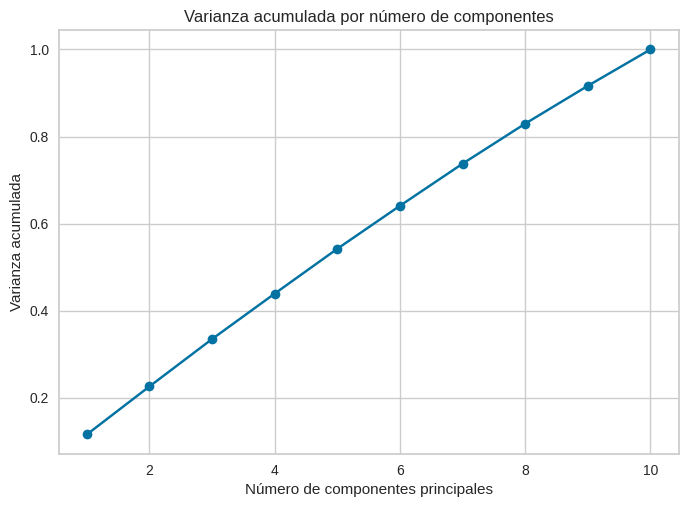

In [236]:
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza acumulada')
plt.title('Varianza acumulada por número de componentes')
plt.show()

Se puede visualizar como aumenta la varianza acumulada en base a los componentes principales que retenemos.
Se probará con un umbral de varianza del 70%, por lo cual, nos quedaremos con 7 componentes.

In [267]:
pca_final = PCA(n_components=7)
componentes_principales= pca_final.fit_transform(var_gen)

In [268]:
df_components = pd.DataFrame(componentes_principales, columns=[f'Componente_{i+1}' for i in range(7)])
df_components

,Componente_1,Componente_2,Componente_3,Componente_4,Componente_5,Componente_6,Componente_7
0,0.055928,-0.800673,-0.075111,-1.689907,0.124768,-0.153938,1.585620
1,-0.156442,-0.381832,0.137550,0.238964,-0.058789,0.073262,0.872865
2,-1.752848,-0.157220,-0.990212,-0.124953,0.417599,1.457509,-0.391472
3,-0.201143,-0.359692,1.125886,1.046362,-0.395021,0.936111,-0.972522
4,-0.314189,-0.658361,1.236099,-1.270093,0.297679,0.425669,0.083282
...,...,...,...,...,...,...,...
965,-0.413388,-0.814365,0.626184,-0.274415,0.299686,-0.757059,0.689707
966,-0.971448,2.222630,0.184056,0.980248,1.015954,1.222248,-1.449362
967,-1.497844,-0.206698,0.915176,-0.478996,0.404013,-0.099277,-1.328054
968,1.241397,0.382558,-1.340425,-0.430768,1.959703,0.399328,1.495289


Una vez ya tenemos los componentes principales se hace la selección final de las características, sobre las cuales se aplicará el clustering con KMeans.

Estas características son las siguientes:
* Los 7 componentes principales.
* Edad.
* Género.
* Condición.

In [269]:
df_final = pd.concat([df_components, df_std['Edad'], columns_cat_std],axis=1)
df_final

,Componente_1,Componente_2,Componente_3,Componente_4,Componente_5,Componente_6,Componente_7,Edad,Female,Male,Condicion_0,Condicion_1,Condicion_2,Condicion_3,Condicion_4,Condicion_5,Condicion_6,Condicion_7,Condicion_8
0,0.055928,-0.800673,-0.075111,-1.689907,0.124768,-0.153938,1.585620,-1.446140,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.156442,-0.381832,0.137550,0.238964,-0.058789,0.073262,0.872865,-0.389450,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-1.752848,-0.157220,-0.990212,-0.124953,0.417599,1.457509,-0.391472,-1.398108,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.201143,-0.359692,1.125886,1.046362,-0.395021,0.936111,-0.972522,1.339678,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.314189,-0.658361,1.236099,-1.270093,0.297679,0.425669,0.083282,-0.053231,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,-0.413388,-0.814365,0.626184,-0.274415,0.299686,-0.757059,0.689707,-1.446140,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
966,-0.971448,2.222630,0.184056,0.980248,1.015954,1.222248,-1.449362,0.667240,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
967,-1.497844,-0.206698,0.915176,-0.478996,0.404013,-0.099277,-1.328054,0.282989,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
968,1.241397,0.382558,-1.340425,-0.430768,1.959703,0.399328,1.495289,0.379051,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Agrupamiento con KMeans

Para determinar el número de clusters se utilizará la técnica de codo.

In [270]:
def codo(data, max_cluster = 10):
  suma_de_cuadrados = []
  for i in range(1, max_cluster + 1):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(data)
    suma_de_cuadrados.append(kmeans.inertia_)
  return suma_de_cuadrados

In [271]:
clusters = 10
mc = codo(df_final, clusters)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

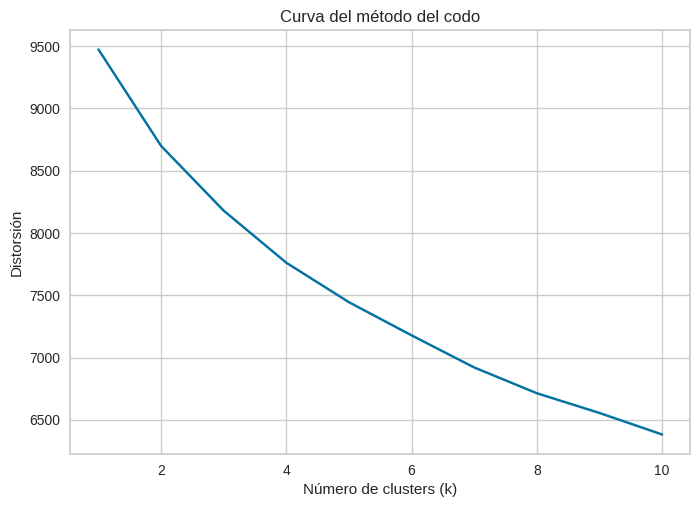

In [272]:
plt.plot(range(1, clusters + 1), mc)
plt.xlabel('Número de clusters (k)')
plt.ylabel('Distorsión')
plt.title('Curva del método del codo')
plt.show()

En base a este gráfico, se intuye que el número de clusters más óptimo está entre 4 y 5.

Se utiliza también otra librería externa como apoyo y para comparar resultados.

In [273]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

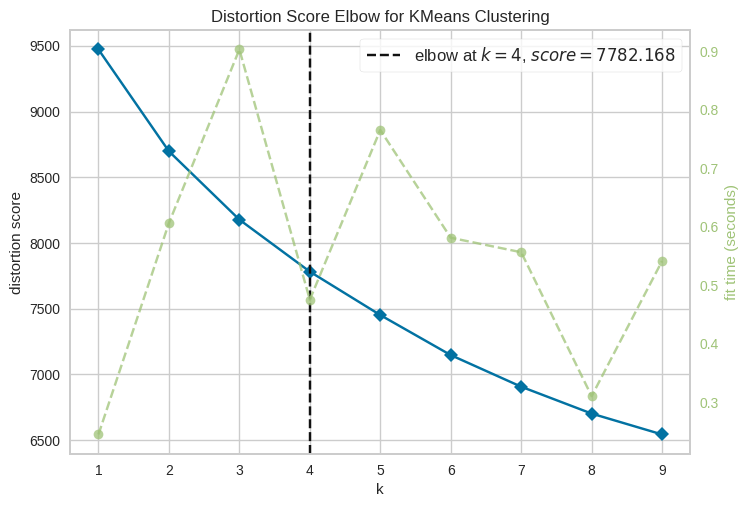

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [274]:
visualizador = KElbowVisualizer(model, k = (1,10))
visualizador.fit(df_final)
visualizador.show()

Según este gráfico, el valor de k tiene que ser 4, y teniendo en cuenta el gráfico anterior, concluimos en que el número de clusters será de 4.

In [275]:
km = KMeans(n_clusters = 4, random_state = 0)
km.fit(df_final)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [276]:
labels = km.labels_
print(labels)

[0 0 0 2 0 0 0 1 3 3 3 3 2 0 2 0 2 3 1 0 2 0 1 3 3 2 2 2 3 1 3 0 3 1 2 2 1
 0 0 3 1 0 2 1 3 3 0 2 0 0 3 0 1 0 3 3 0 2 3 1 2 3 1 0 2 0 3 1 3 2 2 3 2 1
 3 2 3 3 1 2 1 3 2 3 1 2 1 0 0 0 2 1 0 0 2 1 0 2 0 3 0 1 1 2 3 0 1 1 0 1 2
 3 3 2 3 3 2 2 3 2 0 3 2 1 3 0 1 0 1 3 2 3 0 3 0 0 2 2 1 3 3 0 1 1 1 3 2 2
 0 2 2 3 3 0 0 2 1 3 0 3 1 3 3 0 0 3 0 2 3 1 2 3 2 0 1 2 1 1 2 0 0 2 1 3 2
 2 0 3 0 1 3 1 2 3 3 0 3 0 0 0 0 2 2 1 3 3 2 1 3 3 1 1 1 2 2 1 1 3 1 1 3 2
 3 3 3 3 1 1 3 1 2 0 1 3 0 0 0 2 2 0 1 1 3 2 1 2 0 3 1 2 0 0 2 3 1 1 2 1 1
 3 1 3 1 0 3 3 2 2 1 0 3 0 0 2 3 2 3 3 1 1 0 0 1 1 1 1 2 1 2 0 1 3 1 0 1 2
 0 0 1 0 2 1 3 2 3 0 1 0 0 3 0 3 1 0 2 1 0 1 3 0 2 2 1 2 2 0 1 3 3 1 0 0 1
 0 2 0 1 1 0 2 2 3 1 0 0 0 3 0 1 1 1 1 1 3 2 1 2 2 2 2 0 1 1 0 1 3 2 1 2 1
 0 2 3 1 2 2 3 2 2 3 0 2 3 3 1 2 0 2 2 0 3 0 3 2 3 0 0 2 1 2 3 0 2 2 3 0 0
 3 2 3 2 0 3 3 0 0 1 0 3 0 3 0 1 1 3 1 1 2 2 2 1 1 3 2 3 1 1 2 3 2 3 3 1 1
 3 1 3 3 3 1 3 0 2 3 1 0 2 3 1 2 0 2 1 3 3 1 1 1 0 3 0 3 3 1 3 2 2 3 1 3 2
 2 2 0 1 0 0 2 0 0 1 1 3 

In [277]:
centers = km.cluster_centers_
print(centers)

[[-0.86501949 -0.45381694  0.55784929 -0.18808415  0.05629318 -0.38325836
  -0.0692177  -0.57032997  0.53174603  0.46825397  0.14285714  0.0952381
   0.11507937  0.09920635  0.12301587  0.09920635  0.07539683  0.11111111
   0.13888889]
 [ 0.29566761  1.16343844 -0.11628304  0.29121281 -0.417181   -0.16780971
   0.22858281 -0.22426397  0.5173913   0.4826087   0.1         0.17391304
   0.08695652  0.13478261  0.08695652  0.13478261  0.10434783  0.10434783
   0.07391304]
 [-0.45599231 -0.27363072 -0.53099014  0.33806406 -0.2432995   0.28602521
  -0.16895718  0.95334835  0.46753247  0.53246753  0.12987013  0.11688312
   0.12121212  0.07792208  0.1038961   0.0995671   0.12554113  0.11255411
   0.11255411]
 [ 0.99344585 -0.35027344  0.03434164 -0.38005657  0.53684021  0.26889306
   0.01516701 -0.09696343  0.47859922  0.52140078  0.13618677  0.09727626
   0.08560311  0.12062257  0.10894942  0.07392996  0.13618677  0.13618677
   0.10505837]]


# Evaluación del Modelo

In [278]:
from sklearn.metrics import silhouette_score

In [279]:
def silhouette(data, max_clusters = 10):
  scores = []
  for i in range(2, max_clusters + 2):
    kmeans = KMeans(n_clusters = i)
    labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, labels)
    scores.append(silhouette_avg)
  print(scores)
  best_k = 2 + scores.index(max(scores))
  return best_k

In [280]:
print("La cantidad de clusters más óptima es de: ", silhouette(df_final))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[0.07854311735189305, 0.07375579683808985, 0.07375284493808157, 0.07350288471886066, 0.07530381455091732, 0.07804949475173681, 0.07979065926761851, 0.08032949195700262, 0.0754534291955013, 0.07822158302609229]
La cantidad de clusters más óptima es de:  9


# Visualización y Conclusiones

Para visualizar la distribución de los pacientes, comenzamos con gráfico de barras que nos muestra cuantos quedaron en cada cluster.

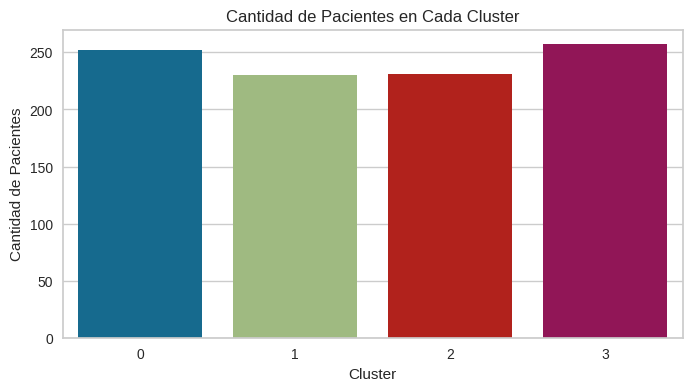

In [309]:
labels_serie = pd.Series(labels)

contador_cluster = labels_serie.value_counts().sort_index()

plt.figure(figsize=(8, 4))
sns.barplot(x=contador_cluster.index, y=contador_cluster.values)
plt.title('Cantidad de Pacientes en Cada Cluster')
plt.xlabel('Cluster')
plt.ylabel('Cantidad de Pacientes')
plt.show()

El siguiente gráfico muestra la densidad de cada una de las condiciones médicas dentro de cada cluster.

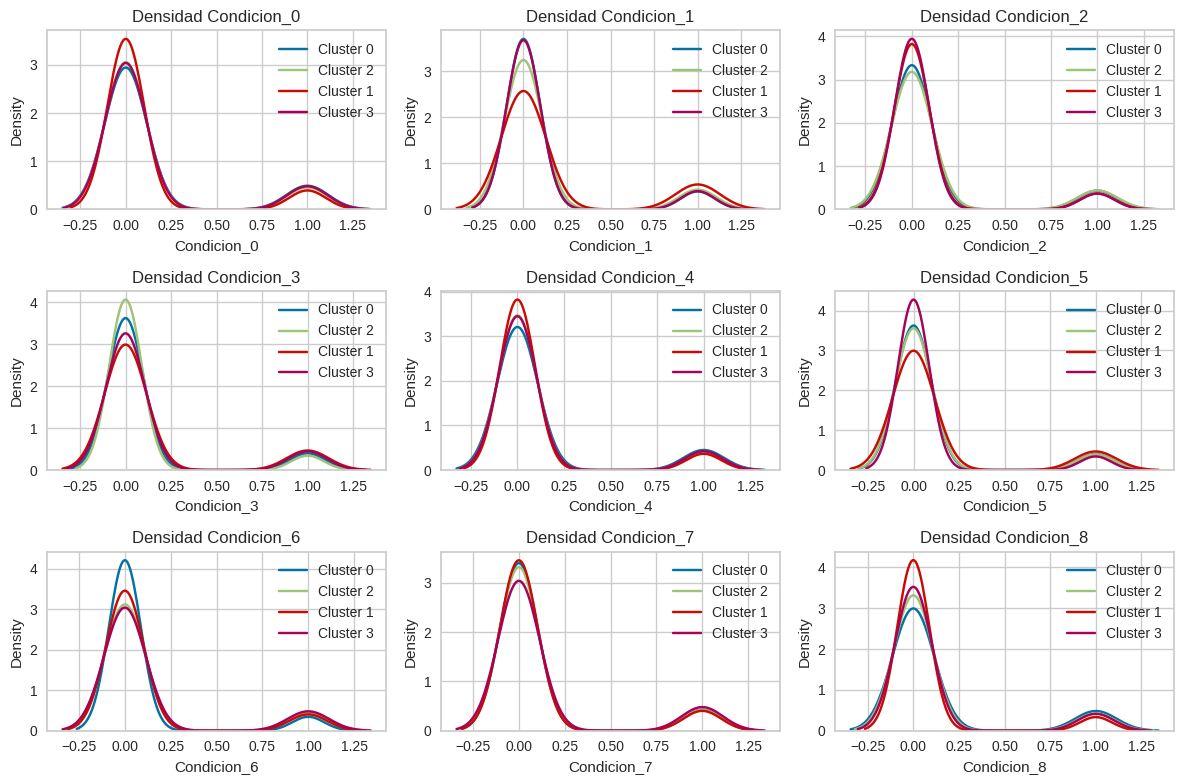

In [308]:
plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    for cluster_label in labels_serie.unique():
        sns.kdeplot(df_final.loc[labels == cluster_label, f'Condicion_{i}'], label=f'Cluster {cluster_label}')
    plt.title(f'Densidad Condicion_{i}')
    plt.legend()
plt.tight_layout()
plt.show()

Agrupamos los pacientes según su condición y el cluster en el que se encuentran.

In [283]:
aux = pd.concat([labels_serie, df_final.filter(like='Condicion_')], axis=1)
aux

,0,Condicion_0,Condicion_1,Condicion_2,Condicion_3,Condicion_4,Condicion_5,Condicion_6,Condicion_7,Condicion_8
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
965,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
966,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
967,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
968,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


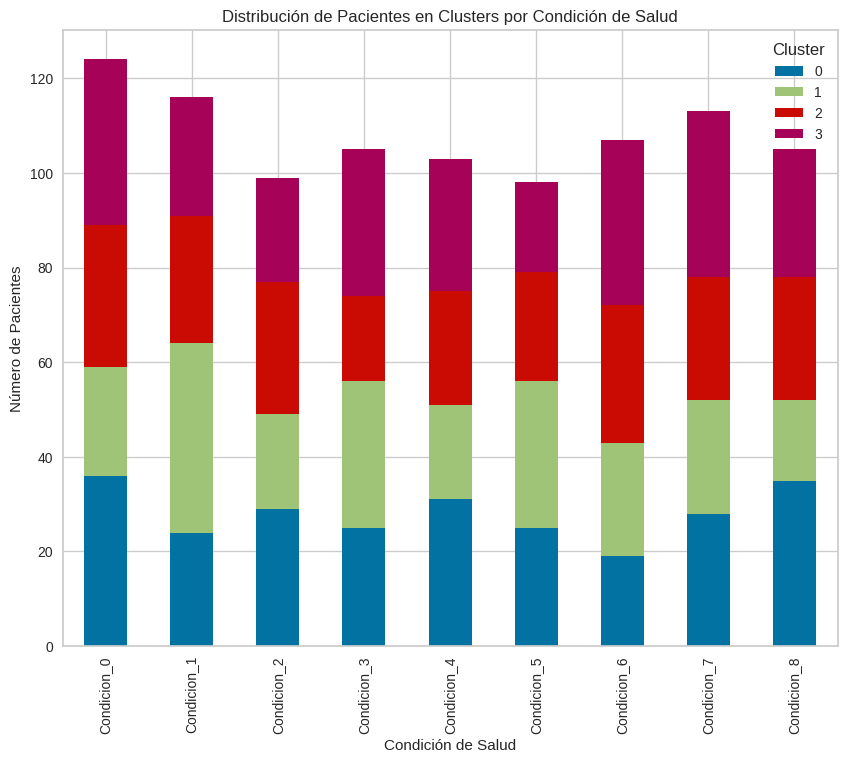

In [306]:
contador_cluster = aux.groupby(0).sum()

contador_cluster.T.plot(kind='bar', stacked=True, figsize=(10, 8))
plt.title('Distribución de Pacientes en Clusters por Condición de Salud')
plt.xlabel('Condición de Salud')
plt.ylabel('Número de Pacientes')
plt.legend(title='Cluster')
plt.show()

Lo mismo que antes, pero con un diagrama de calor.

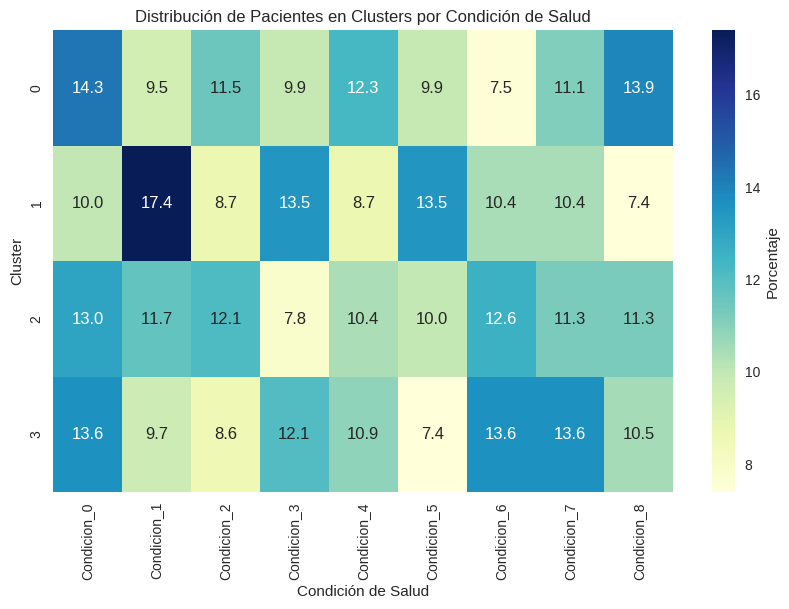

In [304]:
p = contador_cluster.div(contador_cluster.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 6))
sns.heatmap(p, annot=True, cmap="YlGnBu", fmt=".1f", cbar_kws={'label': 'Porcentaje'})
plt.title('Distribución de Pacientes en Clusters por Condición de Salud')
plt.xlabel('Condición de Salud')
plt.ylabel('Cluster')
plt.show()

### Como conclusión, los clusters 2 y 3 son los conjuntos de pacientes más importantes ya que en donde se puede llegar a inferir subtipos de enfermedades, dado a que hay mayor concentración de pacientes con una condición de enfermedad. El cluster 0 sería el que menos en ese sentido.

### Por otro lado, el cluster 1 informaría sobre un tratamiento más especializado, ya que tiene un alto porcentaje de pacientes con la Condición 1 al mismo tiempo que tiene menos en las otras condiciones.


